In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)
#mouse_df.head()
#clinical_df.head()
# Combine the data into a single dataset
trial_df = clinical_df.merge(mouse_df, how= "inner", on= "Mouse ID")

# Display the data table for preview
trial_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meanTumorVolume = trial_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
meanTumorVolume
# Convert to DataFrame
meanTumorVolume_df = pd.DataFrame(data = meanTumorVolume)
# Preview DataFrame
meanTumorVolume_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SETumorVolume = trial_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
SETumorVolume_df = pd.DataFrame(data = SETumorVolume)
# Preview DataFrame
SETumorVolume_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
SETumor_Pivot_df = pd.pivot_table(meanTumorVolume_df, index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
SETumor_Pivot_SE_df = pd.pivot_table(SETumorVolume_df, index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
# Preview that Reformatting worked
SETumor_Pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


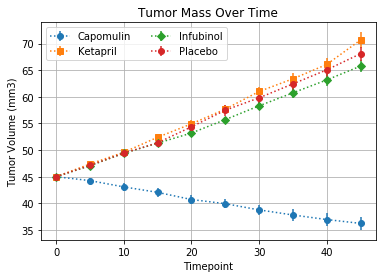

In [29]:
# Generate the Plot (with Error Bars)
SETumor_Pivot_df.head().reset_index()
SETumorVolume_df.head().reset_index()
plt.errorbar(SETumor_Pivot_df.index, SETumor_Pivot_df["Capomulin"],yerr=SETumor_Pivot_SE_df["Capomulin"],
             marker = "o", linestyle = ":")
plt.errorbar(SETumor_Pivot_df.index, SETumor_Pivot_df["Ketapril"], yerr=SETumor_Pivot_SE_df["Ketapril"], 
             marker = "s", linestyle = ":")
plt.errorbar(SETumor_Pivot_df.index, SETumor_Pivot_df["Infubinol"], yerr=SETumor_Pivot_SE_df["Infubinol"], 
             marker = "D", linestyle = ":")
plt.errorbar(SETumor_Pivot_df.index, SETumor_Pivot_df["Placebo"], yerr=SETumor_Pivot_SE_df["Placebo"], 
             marker = "o", linestyle = ":")

plt.legend(loc="upper left", ncol = 2)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Mass Over Time")
plt.grid()

    
    
# Save the Figure



In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site data Grouped by Drug and Timepoint 
meanMet = trial_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
meanMet_df = pd.DataFrame(data = meanMet)
# Preview DataFrame
meanMet_df.head()

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metSE = trial_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
metSE_df = pd.DataFrame(data = metSE)
# Preview DataFrame
metSE_df.head()

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
metSE_pivot = pd.pivot_table(metSE_df, index = "Timepoint", columns = "Drug", values = "Metastatic Sites")
# Preview that Reformatting worked
metSE_pivot

In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#miceCount = trial_df.drop_duplicates(subset= "Mouse ID", keep= "first")
miceCount = trial_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
miceCount_df = pd.DataFrame(data = miceCount)

# Preview DataFrame
miceCount_df.head()


In [ ]:
# Minor Data Munging to Re-Format the Data Frames
miceCount_pivot = pd.pivot_table(miceCount_df, index = "Timepoint", columns = "Drug", values = "Mouse ID")
# Preview the Data Frame
miceCount_pivot

In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()